<a href="https://colab.research.google.com/github/Shayshoon/ML_1/blob/main/HW1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab

params = {'xtick.labelsize': 18,
'ytick.labelsize': 18,
'axes.titlesize' : 22,
'axes.labelsize' : 20,
'legend.fontsize': 18,
'legend.title_fontsize': 22,
'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Loading the dataset

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

In [ ]:
dataset.head()

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,PCR_02,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,709,12,F,39.5,O+,0,2,10,0.2,-2.252313,...,8.746008,-20.185555,10.258711,-16.476419,2.527249,165.077123,-8.030827,3.238998,-1,1
1,732,11,M,25.5,A-,0,1,10,0.2,0.260965,...,7.983439,26.130060,0.902658,97.006095,5.587010,-199.137766,-8.639753,1.750876,-1,1
2,662,6,M,22.0,O+,0,1,8,1.4,-0.010231,...,7.803041,-40.482717,1.944847,50.996507,3.922017,-73.634680,-9.304190,3.037626,1,-1
3,46,3,M,25.4,A+,0,3,9,NaN,0.762668,...,7.228079,-50.649850,9.943822,86.738847,2.956860,-46.209955,-4.263932,0.947817,-1,-1
4,302,14,F,48.1,O-,0,0,10,NaN,0.109750,...,6.991015,-49.426280,1.977101,-22.673927,3.712693,178.000758,-11.629145,1.227133,-1,-1


# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(dataset.conversations_per_day.value_counts())

conversations_per_day
2     220
4     207
3     201
5     153
6     125
1     115
7      77
8      52
10     33
9      23
11     14
12     10
13      7
16      4
14      4
17      3
21      2
Name: count, dtype: int64


```
conversations_per_day
2     220
4     207
3     201
5     153
6     125
1     115
7      77
8      52
10     33
9      23
11     14
12     10
13      7
16      4
14      4
17      3
21      2
Name: count, dtype: int64
```
This feature represents the amount of face-to-face conversations a person makes a day.
This feature has a natural order. The more conversations a person makes per day, the bigger the number. It's not continuous, because there is no clear meaning to the ratio between two different categories (number of conversations per day).


In [ ]:
dataset.pcr_date.value_counts()

,count
pcr_date,
2021-07-20,9
2022-05-18,7
2022-07-18,6
2022-04-28,6
2021-09-04,6
...,...
2021-09-09,1
2022-06-10,1
2021-10-23,1


'patient_id' - \
'age' - Age (Continuous)\
'sex' - Biological sex (Categorical)\
'weight' - Weight, measured in KG (Continuous)\
'blood_type' - Blood type (Categorical)\
'current_location' - Junk feature, all datapoints have current_location as 0\
'num_of_siblings' - Number of siblings (Ordinal)\
'happiness_score' - Happiness score as surveyed by the patient (Ordinal)\
'household_income' - Household income (Continuous)\
'conversations_per_day' - Average amount of face-to-face conversations the patient made a day (Ordinal)\
'sugar_levels' - Blood sugar levels (Continuous)\
'sport_activity' - Number of times doing physical excersize a week (Ordinal)\
'pcr_date' - Date which notes when PCR test was conducted - (Ordinal)\
'PCR_01'\
'PCR_02'\
'PCR_03'\
'PCR_04'\
'PCR_05'\
'PCR_06'\
'PCR_07'\
'PCR_08'\
'PCR_09'\
'PCR_10'\

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=15)

In [ ]:
for key in train_df.keys():
  print(key, train_df[key].isnull().sum())

patient_id 0
age 0
sex 0
weight 0
blood_type 0
current_location 0
num_of_siblings 0
happiness_score 0
household_income 113
PCR_02 59
conversations_per_day 0
sugar_levels 0
sport_activity 0
pcr_date 0
PCR_01 0
PCR_03 0
PCR_04 0
PCR_05 0
PCR_06 0
PCR_07 0
PCR_08 0
PCR_09 0
PCR_10 0
spread 0
risk 0


In [ ]:
for key in test_df.keys():
  print(key, test_df[key].isnull().sum())

patient_id 0
age 0
sex 0
weight 0
blood_type 0
current_location 0
num_of_siblings 0
happiness_score 0
household_income 26
PCR_02 15
conversations_per_day 0
sugar_levels 0
sport_activity 0
pcr_date 0
PCR_01 0
PCR_03 0
PCR_04 0
PCR_05 0
PCR_06 0
PCR_07 0
PCR_08 0
PCR_09 0
PCR_10 0
spread 0
risk 0


In [ ]:
def plot_box(series, title, xlabel):
  cleaned_series = series.dropna()
  plt.figure(figsize=(8, 6))
  plt.boxplot(cleaned_series,
  vert=False)
  plt.xlabel(xlabel)
  plt.title(title)

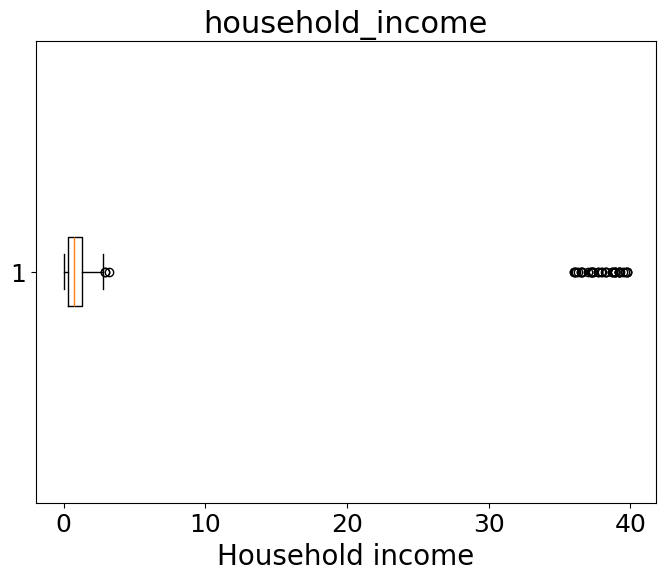

In [ ]:
lbl, description = "household_income", "Household income"
plot_box(train_df[lbl], lbl, description)

Q6:

Outliers are datapoints, or samples, that don't properly represent the pattern of the dataset. They could result from errors of measurement, or represent extreme cases which can heavily influence our analysis of the dataset.

Box plots help us identify the outliers in our by illustrating its distribution.\
The plot has a few key elements. The box, representing 50% of the datapoints, The yellow line representing the median, The whiskers, which extend to the minimum and maximum value of datapoints that are not outliers. And of course the hollow dots which represent the outliers in our dataset.

In the fields we just plotted there are alot of outliers.\
The household outcome for most of our datapoints are in the range $(0,\text{~3})$, but there are a few outliers in the range $(35, 40)$.\
The `PCR_02` field, for most of our data is approximately in the range $(-2.5,2.5)$, but there are many outliers in this field, too.

In [ ]:
print("mean:", train_df.household_income.mean(),"\n", "median:", train_df.household_income.median())
print("mean:", train_df.PCR_02.mean(),"\n", "median:", train_df.PCR_02.median())

mean: 2.487373167981962 
 median: 0.7
mean: 0.5121088283671074 
 median: 0.0349643972615623


Q7:

For the `household_income` field, the mean is ~2.487 and the median is 0.7\
The reason for the significant difference is the outliers. Because there are a few datapoints with significantly larger values than most of the dataset, they heavily influence the mean. Because there are relatively few outliers, the median still represents most of the data much better.

For the `PCR_02` field, the mean is ~0.5121 and the median is ~0.0349
The difference here is cause by a similar reason to the last field. there are few datapoints with significantly larger values that affect the mean, but not the median.

For these reasons, in our opinion, filling the missing values with the median values is the better option. We don't want the new values to be determined by the outliers in our dataset.

In [ ]:
hhi = train_df.household_income.median()
pcr = train_df.PCR_02.median()
train_df.fillna(value={"household_income": hhi, "PCR_02": pcr}, inplace=True)

In [ ]:
for key in train_df.keys():
  print(key, train_df[key].isnull().sum())

patient_id 0
age 0
sex 0
weight 0
blood_type 0
current_location 0
num_of_siblings 0
happiness_score 0
household_income 0
PCR_02 0
conversations_per_day 0
sugar_levels 0
sport_activity 0
pcr_date 0
PCR_01 0
PCR_03 0
PCR_04 0
PCR_05 0
PCR_06 0
PCR_07 0
PCR_08 0
PCR_09 0
PCR_10 0
spread 0
risk 0


Q8
The pair 01 and 08 seems to be the most seaprable if we allow ourselfs to imagine an ellipse that encircels the middle.

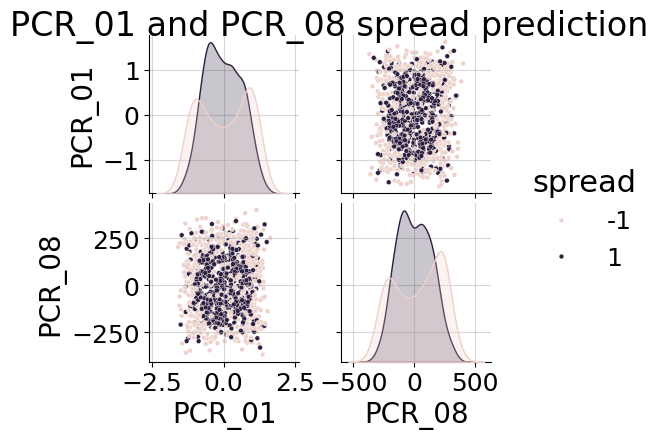

In [ ]:
g=sns.pairplot(data=train_df,
               vars=['PCR_01', 'PCR_08'], plot_kws={"s": 12},
               hue='spread')
g.fig.suptitle("PCR_01 and PCR_08 spread prediction", y=1.04)
for ax in np.ravel(g.axes):
   ax.grid(alpha=0.5)
g.fig.set_size_inches(6,4)

Q9
correlation is weak if two variables are independent from each other, to find good seperators we need to look for independent so actully weak correlation helps explain our findings from Q8.

In [ ]:
train_df['PCR_01'].corr(train_df['PCR_08'])

0.03377098377993925

Q10
 to do

In [ ]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
from scipy.stats import mode
class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors


  def fit(self, X, y):
    self.X_train = np.copy(X)
    self.y_train = np.copy(y)
    return self

  def predict(self, X):
    # Note: You can use self.n_neighbors here
        X = np.array(X)
        predictions = []

        #bring the k closest neighbors lables
        distances = cdist(X, self.X_train, metric="euclidean")
        k_neighbors_indices = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        k_neighbors_labels = self.y_train[k_neighbors_indices]

        predictions = mode(k_neighbors_labels, axis=1).mode.flatten()

        # TODO: compute the predicted labels (+1 or -1)
        return predictions



In [ ]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


Q11

training acc:  1.0
test acc: 0.608


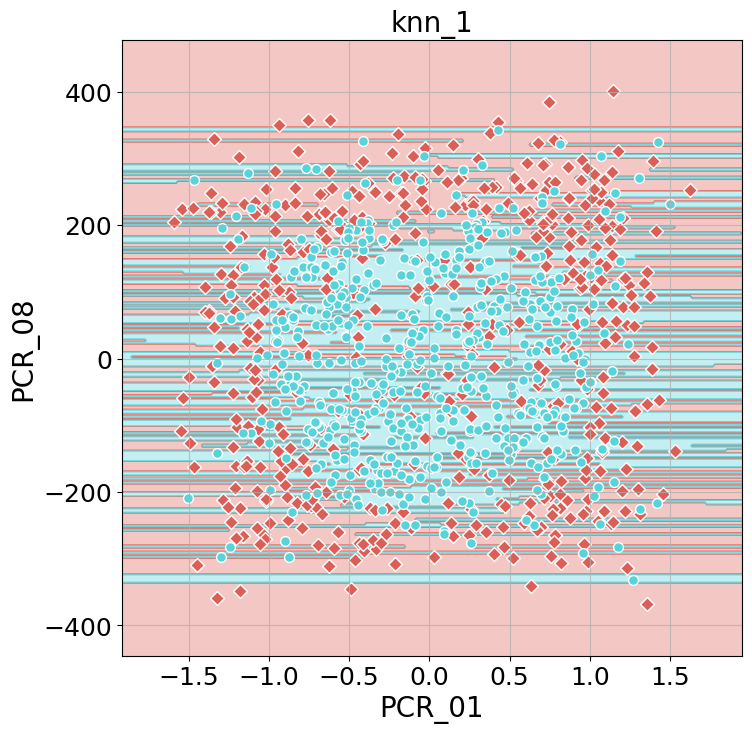

In [ ]:
h = kNN(1)
Xtrain = np.array(train_df[['PCR_01', 'PCR_08']])
Ytrain = train_df.spread
Xtest = np.array(test_df[['PCR_01', 'PCR_08']])
Ytest = test_df.spread
h.fit(Xtrain, Ytrain)
print('training acc: ', h.score(Xtrain, Ytrain))
print('test acc:', h.score(Xtest, Ytest))
visualize_clf(h, Xtrain, Ytrain, title='knn_1', xlabel='PCR_01', ylabel='PCR_08')

Q12 when the model calculted distances between dots acoording to their coordinates. if the data is not normalized the calcultion will too much weight to the feature with the larger values. in this case PCR_08 was 2 order of magnitude bigger so as a resault the function almost ignored PCR_01.

training acc:  1.0
test acc: 0.732


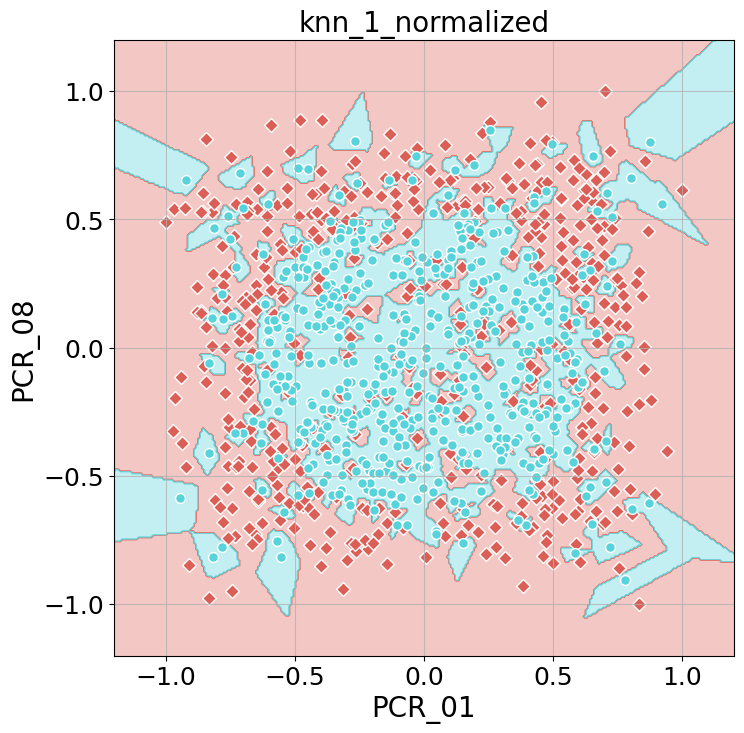

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(Xtrain)
normXtrain = scaler.transform(Xtrain)
scaler.fit(Xtest)
normXtest = scaler.transform(Xtest)
h_norm = kNN(1)
h_norm.fit(normXtrain, Ytrain)

print('training acc: ', h_norm.score(normXtrain, Ytrain))
print('test acc:', h_norm.score(normXtest, Ytest))
visualize_clf(h_norm, normXtrain, Ytrain, title='knn_1_normalized', xlabel='PCR_01', ylabel='PCR_08')

Q13
the effect of k on our decision regions was that for a k=1, we encountered overfitting. as a result, the training accuracy was perfect but the test accuracy was less than desirable.  that is because for each datapoint in the train set, the model stored almost exactly the coordinate of that point and thats why it performed so perfectly on the train set and poorly on the test set.
for a larger k of k=9, the decision regions are much more evenly spread and although not perfect, we reached a better score on the test set and a similar score on the train set.



training acc:  0.785
test acc: 0.784


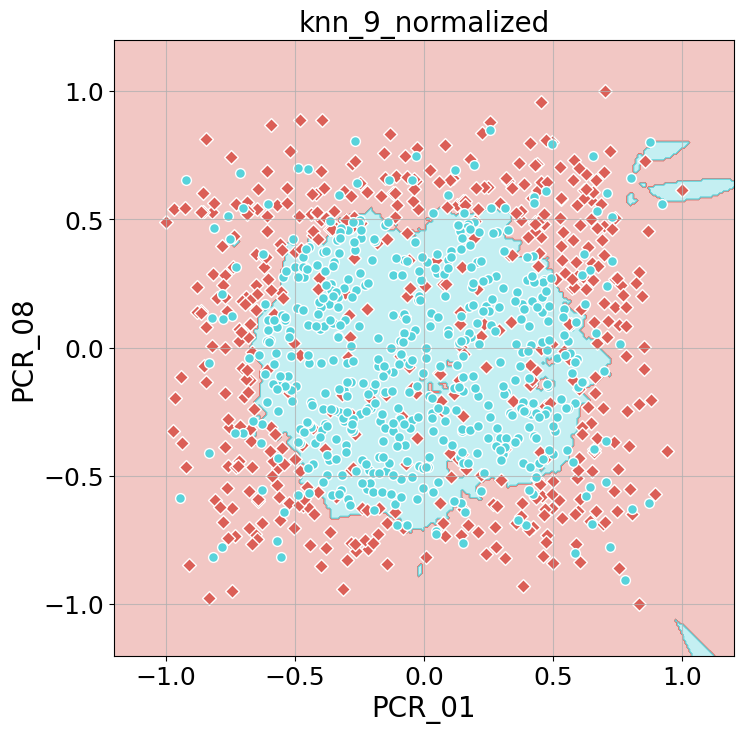

In [ ]:
h_norm = kNN(9)
h_norm.fit(normXtrain, Ytrain)

print('training acc: ', h_norm.score(normXtrain, Ytrain))
print('test acc:', h_norm.score(normXtest, Ytest))
visualize_clf(h_norm, normXtrain, Ytrain, title='knn_9_normalized', xlabel='PCR_01', ylabel='PCR_08')

Q14
because the chi squared distribution is biased, the values are likely to be more dense around 0, which is about the minimum. but this distribution doesn't have a maximum value so when normalizing using the min max scaling , the result could be very heavily biased towards 0 with some outliers close to 1. that way, we could get a very unevenly normalized dataset which would gravely hinder our abilities to statistically analyze the dataset


TASK E

In [87]:
train_df['SpecialProperty'] = train_df['blood_type'].isin(["O+", "B+"])
test_df['SpecialProperty'] = test_df['blood_type'].isin(["O+", "B+"])
train_df[['blood_type', 'SpecialProperty']]

,blood_type,SpecialProperty
310,O+,True
136,A+,False
566,A+,False
556,O+,True
813,O+,True
...,...,...
1223,O+,True
667,O+,True
156,O+,True
384,A+,False


In [91]:
train_df = train_df.drop(columns=['blood_type'])
test_df = test_df.drop(columns=['blood_type'])

In [94]:
list(train_df.keys())


['patient_id',
 'age',
 'sex',
 'weight',
 'current_location',
 'num_of_siblings',
 'happiness_score',
 'household_income',
 'PCR_02',
 'conversations_per_day',
 'sugar_levels',
 'sport_activity',
 'pcr_date',
 'PCR_01',
 'PCR_03',
 'PCR_04',
 'PCR_05',
 'PCR_06',
 'PCR_07',
 'PCR_08',
 'PCR_09',
 'PCR_10',
 'spread',
 'risk',
 'SpecialProperty']

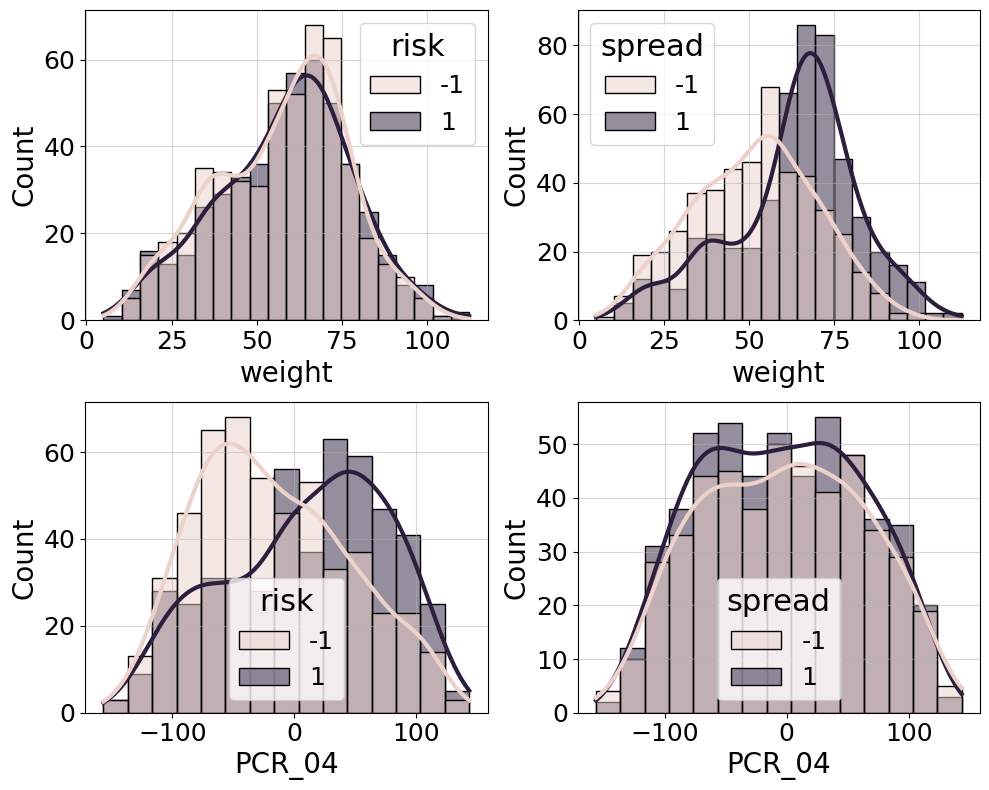

In [100]:
COL_NAME = ['weight', 'PCR_04']
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]
  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
    isContinuous = "float" in train_df[column].dtype.name
    sns.histplot(data=train_df, x=column, hue=cls, line_kws={"linewidth": 3},
    kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)
plt.tight_layout()

Q15

This plot makes us think the weight feature is informative because we can see a certain correlation between the weight and spread. we can see that patients with a higher weight value are more likely to have a spread value of 1.

Q16

For the same reasons as Q15, we think the PCR_04 feature is informative because we can see a correlation between it and the risk attribute. we can see that patients with a higher PCR_04 value are more likely to have a risk value of 1.

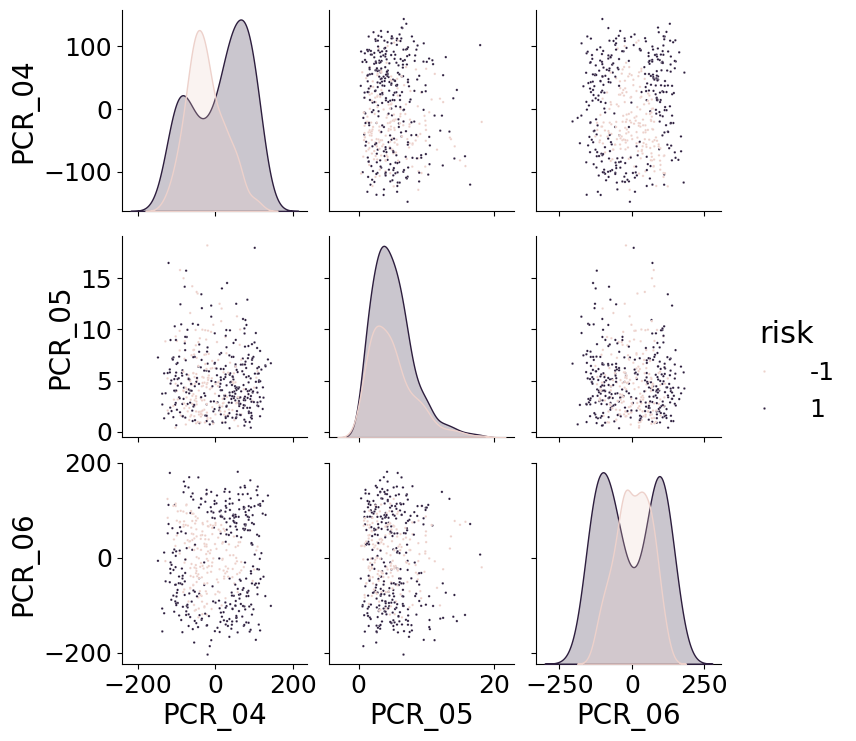

In [107]:
sns.pairplot(train_df[train_df.SpecialProperty == False][["PCR_04","PCR_05","PCR_06"] + ["risk"]], plot_kws={"s": 3}, hue="risk")

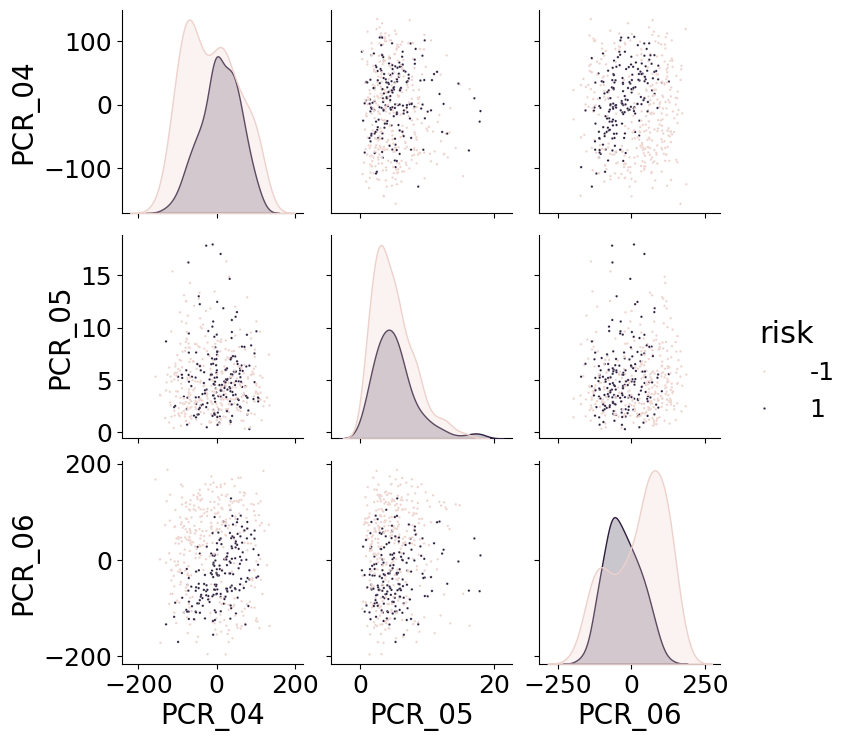

In [108]:
sns.pairplot(train_df[train_df.SpecialProperty == True][["PCR_04","PCR_05","PCR_06"] + ["risk"]], plot_kws={"s": 3}, hue="risk")

Q17

We can see that in both 'matrices', the most informative pair of features is PCR_06 and PCR_04. this is because we can clearly see a distinct seperation between the positions of risk 1 and risk -1 on the plots. the distinction is alot more pronounced with the pair PCR_06 and PCR_04.

Text(0.5, 0.98, 'PCR_04 vs. PCR_06 (rest of blood types)')

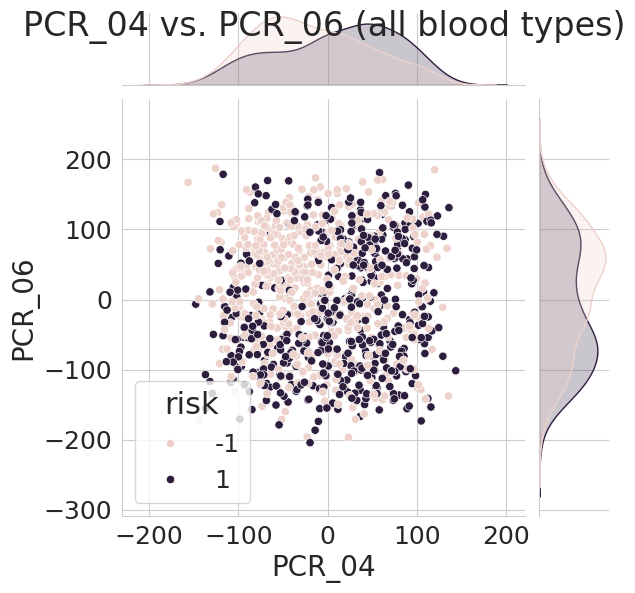

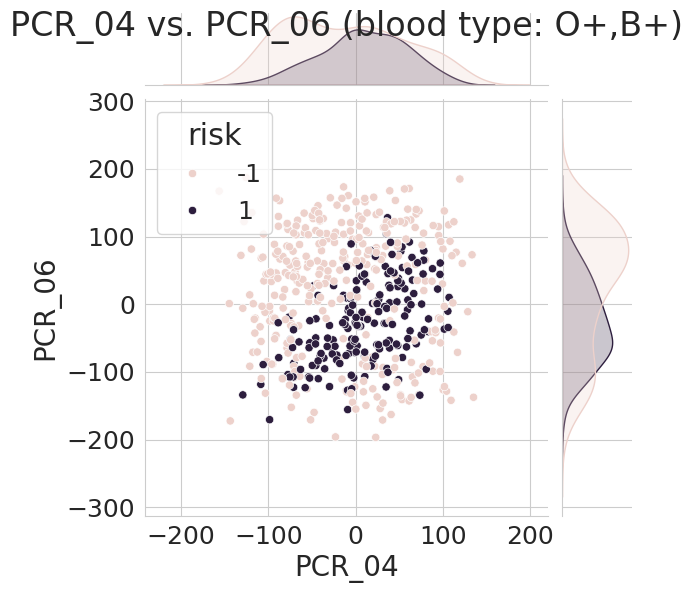

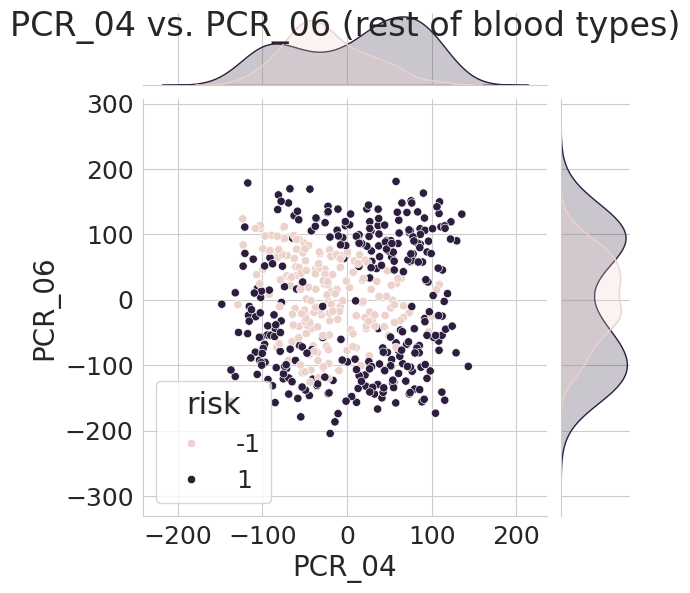

In [120]:
sns.set_style("whitegrid")
p1 = sns.jointplot(data=train_df, x="PCR_04", y="PCR_06", hue="risk")
p1.fig.suptitle("PCR_04 vs. PCR_06 (all blood types)")

p2 = sns.jointplot(data=train_df[train_df.SpecialProperty == True], x="PCR_04", y="PCR_06", hue="risk")
p2.fig.suptitle("PCR_04 vs. PCR_06 (blood type: O+,B+)")


p3 = sns.jointplot(data=train_df[train_df.SpecialProperty == False], x="PCR_04", y="PCR_06", hue="risk")
p3.fig.suptitle("PCR_04 vs. PCR_06 (rest of blood types)")


In [129]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

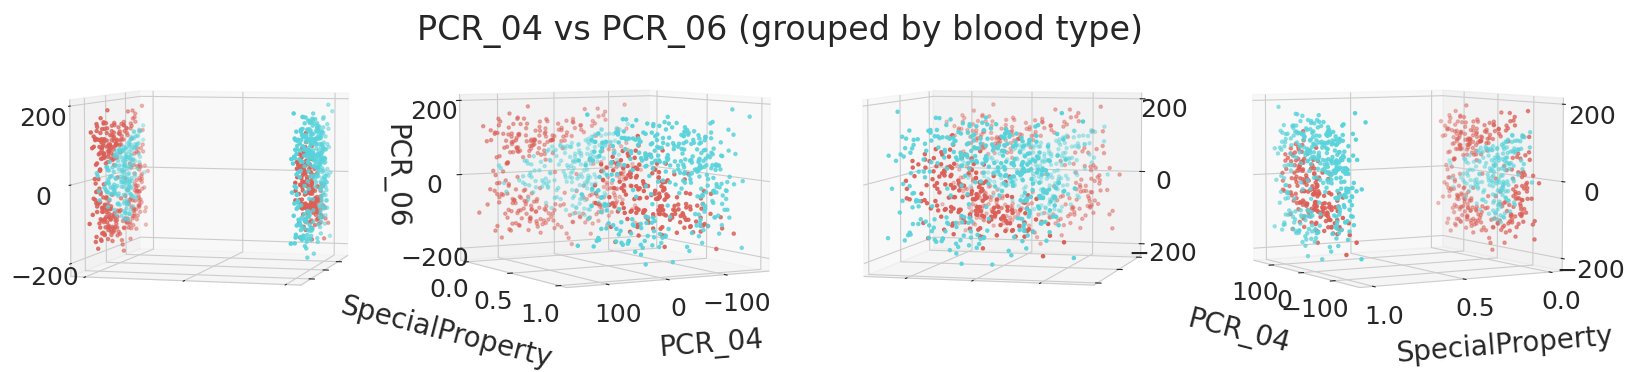

In [132]:
plot3d(train_df, "PCR_04", "SpecialProperty", "PCR_06", title="PCR_04 vs PCR_06 (grouped by blood type)", hue="risk", s=5)

Q20

a depth 3 tree cant fit the data very well, this is because we cant accurately predict the risk factor of a datapoint using just three comparisons on these features. the relation between the features isn't linear, so 3 splits on individual features can't reliably predict the risk factor.

Q21

a depth 30 tree could fit the training data alot better than a depth 3 tree. but this could prove to be too deep of a tree. for 30 layers, we can produce up to $2^{30}=1073741824$ leaves. we only have less than 1500 datapoints, so with a tree of this depth we might encounter a problem of overfitting and the get a perfect training accuracy.

Q22

a 1-NN model might not work well for our current unnormalized data. this is because the PCR_04 and PCR_06 features have very large values. in the diagrams, the blood type groups look very distinct, but if we take the unnormalized features into account, the numerical difference between them is almost negligible. As mentioned before by our medical experts, we must differentiate between the blood type groups, but that could prove impossible for this model using our current unnormalized dataset.